In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
%store -r df
%store -r df1
%store -r df2
%store -r df2_no_dups
%store -r df3
%store -r df3_no_dups
%store -r df_dur_readytoship_truck
%store -r df_dur_readytoship_truck_standard
%store -r df_dur_readytoship_truck_xpress
%store -r df_no_dups
%store -r df_order_del_time
%store -r df_order_del_time2
%store -r df_order_del_total
%store -r df_prep_dur_ver

In [4]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df1.columns = map(str.lower, df1.columns)
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = map(str.lower, df2.columns)
df2.columns = df2_no_dups.columns.str.replace(' ', '_')
df2_no_dups.columns = map(str.lower, df2.columns)
df2_no_dups.columns = df2_no_dups.columns.str.replace(' ', '_')
df3.columns = map(str.lower, df3.columns)
df3.columns = df3_no_dups.columns.str.replace(' ', '_')
df3_no_dups.columns = map(str.lower, df3_no_dups.columns)
df3_no_dups.columns = df3_no_dups.columns.str.replace(' ', '_')
df_dur_readytoship_truck.columns = map(str.lower, df_dur_readytoship_truck.columns)
df_dur_readytoship_truck.columns = df_dur_readytoship_truck.columns.str.replace(' ', '_')
df_dur_readytoship_truck_standard.columns = map(str.lower, df_dur_readytoship_truck_standard.columns)
df_dur_readytoship_truck_standard.columns = df_dur_readytoship_truck_standard.columns.str.replace(' ', '_')
df_dur_readytoship_truck_xpress.columns = map(str.lower, df_dur_readytoship_truck_xpress.columns)
df_dur_readytoship_truck_xpress.columns = df_dur_readytoship_truck_xpress.columns.str.replace(' ', '_')
df_no_dups.columns = map(str.lower, df_no_dups.columns)
df_no_dups.columns = df_no_dups.columns.str.replace(' ', '_')
df_order_del_time.columns = map(str.lower, df_order_del_time.columns)
df_order_del_time.columns = df_order_del_time.columns.str.replace(' ', '_')
df_order_del_time2.columns = map(str.lower, df_order_del_time2.columns)
df_order_del_time2.columns = df_order_del_time2.columns.str.replace(' ', '_')
df_order_del_total.columns = map(str.lower, df_order_del_total.columns)
df_order_del_total.columns = df_order_del_total.columns.str.replace(' ', '_')
df_prep_dur_ver.columns = map(str.lower, df_prep_dur_ver.columns)
df_prep_dur_ver.columns = df_prep_dur_ver.columns.str.replace(' ', '_')

In [5]:
display(df.sample(5))
display(df1.sample(5))
display(df2.sample(5))
display(df2_no_dups.sample(5))
display(df3.sample(5))
display(df3_no_dups.sample(5))
display(df_dur_readytoship_truck.sample(5))
display(df_dur_readytoship_truck_standard.sample(5))
display(df_dur_readytoship_truck_xpress.sample(5))
display(df_no_dups.sample(5))
display(df_order_del_time.sample(5))
display(df_order_del_time2.sample(5))
display(df_order_del_total.sample(5))
display(df_prep_dur_ver.sample(5))

,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
1294,CA-2020-113278,2020-01-14,Standard Class,HR-14770,Hallie Redmond,United States,Richmond,Indiana,47374.0,Central,OFF-FA-10003472,2.520,2,0.0,0.1008
9170,US-2018-126753,2018-08-16,Standard Class,SP-20860,Sung Pak,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-FU-10001488,254.352,3,0.2,0.0000
1464,CA-2019-142097,2019-10-15,Standard Class,QJ-19255,Quincy Jones,United States,Springfield,Virginia,22153.0,South,OFF-AP-10000696,43.260,3,0.0,14.2758
9137,CA-2020-103415,2020-12-03,Standard Class,MV-17485,Mark Van Huff,United States,Houston,Texas,77041.0,Central,FUR-FU-10000820,13.592,2,0.6,-14.2716
7150,CA-2020-133256,2020-06-26,First Class,TH-21550,Tracy Hopkins,United States,Detroit,Michigan,48227.0,Central,OFF-AR-10003158,15.920,4,0.0,5.4128


,order_id,arrival_scan_date
75,CA-2019-153682,2019-06-06
28,CA-2019-126165,2019-05-14
190,CA-2019-146913,2019-11-11
24,CA-2019-106530,2019-05-13
167,CA-2019-114748,2019-10-21


,order_id,on_truck_scan_date,ship_mode
2373,CA-2019-124562,2019-12-16,Standard Processing
2841,CA-2020-125878,2020-03-04,Standard Processing
4810,CA-2020-152933,2020-10-19,Standard Processing
1474,CA-2019-165918,2019-09-18,Standard Processing
2531,CA-2019-101651,2020-01-03,Standard Processing


,order_id,on_truck_scan_date,ship_mode
2553,CA-2019-163951,2020-01-03,Express
3950,US-2020-106551,2020-07-29,Standard Processing
1502,CA-2019-105732,2019-09-20,Standard Processing
2297,CA-2019-140564,2019-12-11,Standard Processing
4105,CA-2020-118892,2020-08-26,Standard Processing


,order_id,ready_to_ship_date,pickup_date
9,CA-2019-126732,2019-09-06,2019-09-09
59,CA-2019-102162,2019-09-16,2019-09-18
248,CA-2020-103380,2020-11-27,2020-11-30
217,CA-2020-131254,2020-11-23,2020-11-23
47,CA-2019-164350,2019-09-12,2019-09-13


,order_id,ready_to_ship_date,pickup_date
55,CA-2019-112277,2019-09-16,2019-09-18
3,CA-2019-129630,2019-09-04,2019-09-04
266,CA-2020-161459,2020-11-30,2020-12-02
210,CA-2020-138163,2020-11-20,2020-11-20
150,CA-2020-125290,2020-11-10,2020-11-12


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
141,CA-2020-113873,2020-11-20,Standard Processing,2020-11-19,2020-11-20,1 days,Friday
41,CA-2019-158610,2019-09-23,Express,2019-09-23,2019-09-23,0 days,Monday
198,CA-2020-107125,2020-12-04,Standard Processing,2020-12-02,2020-12-04,2 days,Friday
193,CA-2020-165029,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days,Wednesday
62,CA-2019-163202,2019-10-04,Standard Processing,2019-10-02,2019-10-04,2 days,Friday


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
162,CA-2020-118122,2020-11-25,Standard Processing,2020-11-24,2020-11-25,1 days,Wednesday
161,CA-2020-124674,2020-11-25,Standard Processing,2020-11-23,2020-11-25,2 days,Wednesday
155,CA-2020-104864,2020-11-25,Standard Processing,2020-11-23,2020-11-25,2 days,Wednesday
188,CA-2020-164028,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days,Wednesday
131,CA-2020-152142,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days,Wednesday


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
147,CA-2020-121818,2020-11-23,Express,2020-11-23,2020-11-23,0 days,Monday
133,CA-2020-138163,2020-11-20,Express,2020-11-20,2020-11-20,0 days,Friday
42,US-2019-147340,2019-09-25,Express,2019-09-24,2019-09-25,1 days,Wednesday
69,CA-2020-147760,2020-11-06,Express,2020-11-05,2020-11-06,1 days,Friday
114,CA-2020-107825,2020-11-18,Express,2020-11-18,2020-11-18,0 days,Wednesday


,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
7233,CA-2019-140774,2019-09-05,Standard Class,BE-11455,Brad Eason,United States,Olathe,Kansas,66062.0,Central,OFF-AR-10004022,107.94,3,0.0,26.9850
7522,CA-2020-164378,2020-07-15,Second Class,MM-18055,Michelle Moray,United States,New York City,New York,10024.0,East,OFF-AR-10001177,6.56,2,0.0,1.9024
1883,US-2020-146416,2020-10-20,Second Class,JE-16165,Justin Ellison,United States,Woodland,California,95695.0,West,OFF-LA-10003714,3.75,1,0.0,1.8000
8148,US-2019-164196,2019-11-11,Standard Class,AS-10285,Alejandro Savely,United States,Noblesville,Indiana,46060.0,Central,FUR-TA-10001950,2678.94,6,0.0,241.1046
5329,CA-2020-145807,2020-02-09,Standard Class,SB-20170,Sarah Bern,United States,Los Angeles,California,90032.0,West,OFF-ST-10001370,354.90,5,0.0,17.7450


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
174,CA-2019-156503,2019-10-23,Standard Processing,2019-10-28,5 days
23,CA-2019-104311,2019-05-08,Standard Processing,2019-05-13,5 days
210,CA-2019-130799,2019-11-20,Standard Processing,2019-11-25,5 days
101,CA-2019-102981,2019-09-11,Standard Processing,2019-09-16,5 days
66,CA-2019-142762,2019-05-29,Standard Processing,2019-06-03,5 days


,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
8,CA-2019-133123,2019-09-16,2019-09-11,2019-09-13,3 days
16,CA-2019-168557,2019-09-30,2019-09-23,2019-09-25,5 days
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18,5 days
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16,3 days
6,CA-2019-102981,2019-09-16,2019-09-09,2019-09-11,5 days


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time
463,CA-2019-117583,2019-12-09,2019-11-27,CB-12025,Cassandra Brandow,12 days
305,CA-2019-134376,2019-10-14,2019-10-02,TT-21265,Tim Taslimi,12 days
170,CA-2019-129630,2019-09-09,2019-09-04,IM-15055,Ionia McGrath,5 days
175,CA-2019-145303,2019-09-10,2019-08-28,TP-21415,Tom Prescott,13 days
274,CA-2019-145898,2019-10-01,2019-09-26,CM-12445,Chuck Magee,5 days


,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
311,US-2020-128118,2020-11-24,MY-17380,Maribeth Yedwab,2020-12-01,2020-12-02,7 days,Tuesday
83,CA-2020-102610,2020-11-04,CA-12265,Christina Anderson,2020-11-09,2020-11-12,5 days,Wednesday
268,CA-2020-121468,2020-11-19,KD-16345,Katherine Ducich,2020-11-20,2020-11-20,1 days,Thursday
329,CA-2019-131205,2019-09-04,AA-10645,Anna Andreadi,2019-09-09,2019-09-11,5 days,Wednesday
129,CA-2020-110842,2020-11-11,GA-14725,Guy Armstrong,2020-11-16,2020-11-18,5 days,Wednesday


In [6]:
df_prep_dur_ver['weekday'] = df_prep_dur_ver['order_date'].dt.day_name()

df_prep_dur_ver

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7 days,Monday
1,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7 days,Monday
2,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7 days,Monday
3,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,6 days,Wednesday
4,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,6 days,Wednesday
...,...,...,...,...,...,...,...,...
413,CA-2020-152142,2020-11-14,LW-16990,Lindsay Williams,2020-11-16,2020-11-18,2 days,Saturday
414,US-2019-134488,2019-09-24,PK-19075,Pete Kriz,2019-10-01,2019-10-02,7 days,Tuesday
415,CA-2020-103499,2020-11-20,ES-14020,Erica Smith,2020-11-24,2020-11-25,4 days,Friday
416,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,3 days,Monday


In [7]:
df_prep_dur_ver.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
101,CA-2020-136308,2020-11-16,MW-18235,Mitch Willingham,2020-11-16,2020-11-16,0 days,Monday
391,CA-2019-166772,2019-09-20,HJ-14875,Heather Jas,2019-09-24,2019-09-25,4 days,Friday
279,CA-2020-105333,2020-11-30,VP-21730,Victor Preis,2020-12-04,2020-12-07,4 days,Monday
9,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,1 days,Tuesday
139,CA-2020-127782,2020-11-02,TH-21115,Thea Hudgings,2020-11-06,2020-11-09,4 days,Monday
107,CA-2019-144764,2019-09-02,RL-19615,Rob Lucas,2019-09-09,2019-09-11,7 days,Monday
23,US-2020-165344,2020-11-13,SB-20290,Sean Braxton,2020-11-16,2020-11-16,3 days,Friday
223,CA-2020-168641,2020-11-24,KA-16525,Kelly Andreada,2020-12-01,2020-12-02,7 days,Tuesday
281,CA-2020-161130,2020-11-03,BF-11275,Beth Fritzler,2020-11-09,2020-11-12,6 days,Tuesday
125,US-2020-124926,2020-11-13,ME-17320,Maria Etezadi,2020-11-18,2020-11-20,5 days,Friday


In [8]:
# Group the data by weekday and find the maximum preparation duration for each weekday
max_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].max()

# Print or analyze the maximum preparation duration for each weekday
print("Maximum preparation duration for each weekday:")
print(max_prep_duration_by_weekday)


Maximum preparation duration for each weekday:
weekday
Friday      7 days
Monday      7 days
Saturday    6 days
Sunday      8 days
Thursday    6 days
Tuesday     7 days
Wednesday   6 days
Name: prep_duration, dtype: timedelta64[ns]


In [9]:
# Group the data by weekday and find the minimum preparation duration for each weekday
min_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].min()

# Print or analyze the minimum preparation duration for each weekday
print("Minimum preparation duration for each weekday:")
print(min_prep_duration_by_weekday)


Minimum preparation duration for each weekday:
weekday
Friday      0 days
Monday      0 days
Saturday    2 days
Sunday      4 days
Thursday    0 days
Tuesday     0 days
Wednesday   0 days
Name: prep_duration, dtype: timedelta64[ns]


In [10]:
# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()


average_prep_duration_by_weekday.sort_values(ascending=False)



weekday
Sunday                6 days 09:36:00
Tuesday               4 days 13:48:00
Saturday    4 days 12:24:49.655172413
Friday      4 days 03:34:03.243243243
Thursday    4 days 00:21:10.588235294
Wednesday   3 days 23:07:57.108433734
Monday      3 days 19:08:21.265822784
Name: prep_duration, dtype: timedelta64[ns]

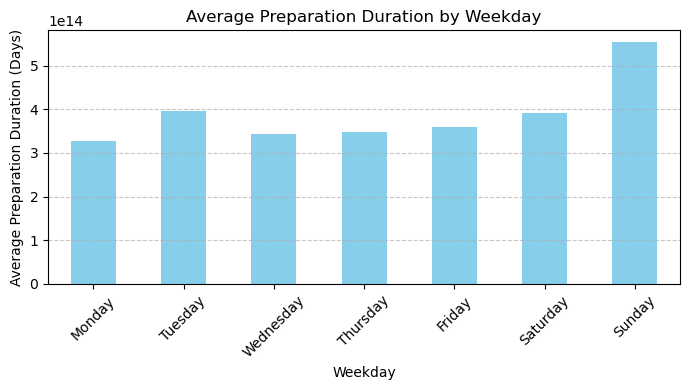

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()

# Create a bar plot
plt.figure(figsize=(7, 4))
average_prep_duration_by_weekday.loc[custom_order].plot(kind='bar', color='skyblue')
plt.title('Average Preparation Duration by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


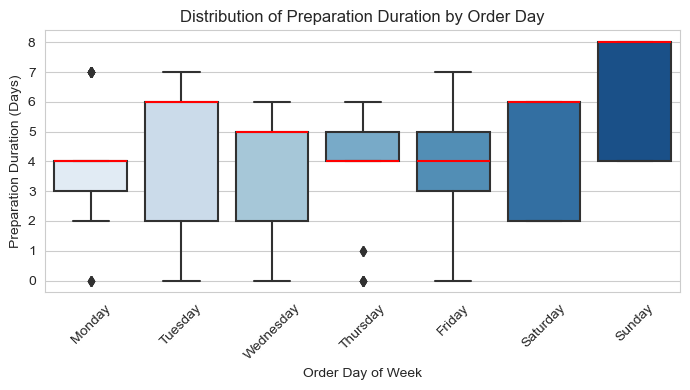

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#KPI 1 order date - ready to ship date
# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Order the weekdays by their natural order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots with ordered weekdays and blue color
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Blues',
            order=weekdays_order, medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


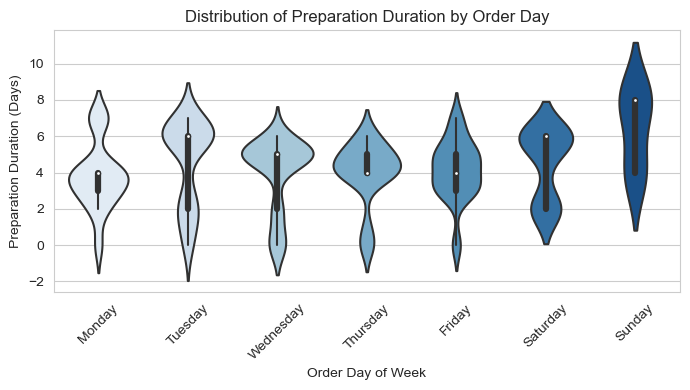

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as a violin plot with custom weekday order
plt.figure(figsize=(7, 4))
sns.violinplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Blues', order=custom_order)
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Define the norm for preparation time
norm_prep_time = 2

# Create bins for categorizing preparation duration
bins = [-np.inf, norm_prep_time-1, norm_prep_time+1, np.inf]
labels = ['Early', 'On Time', 'Late']

# Create a new column 'status' to indicate the status of each order
df_prep_dur_ver['status'] = pd.cut(df_prep_dur_ver['prep_duration'], bins=bins, labels=labels)

# Count the number of orders in each status category
status_counts = df_prep_dur_ver['status'].value_counts()

# Print the counts
print("Number of orders by status:")
print(status_counts)



In [ ]:
status_counts_percent = (status_counts/418).round(2)
status_counts_percent

In [ ]:
df_prep_dur_ver.describe()

In [36]:
# KPI 2


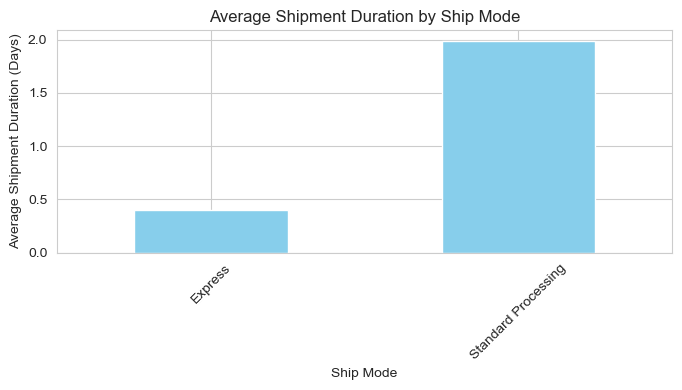

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_dur_readytoship_truck' is your DataFrame containing the data

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by ship mode and calculate the average duration for each mode
average_duration_by_ship_mode = df_dur_readytoship_truck.groupby('ship_mode')['shipment_duration'].mean()

# Plot the average duration by ship mode
plt.figure(figsize=(7, 4))
average_duration_by_ship_mode.plot(kind='bar', color='skyblue')
plt.title('Average Shipment Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipment Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


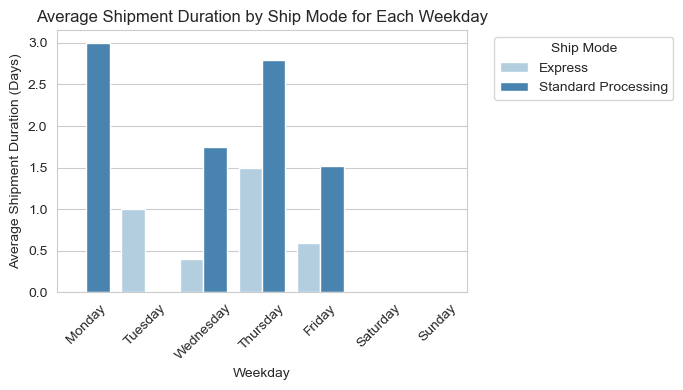

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by weekday and ship mode and calculate the average duration for each weekday and ship mode combination
average_duration_by_weekday_and_ship_mode = df_dur_readytoship_truck.groupby(['weekday', 'ship_mode'])['shipment_duration'].mean().reset_index()

# Plot the average duration by ship mode for each weekday
plt.figure(figsize=(7, 4))
sns.barplot(x='weekday', y='shipment_duration', hue='ship_mode', data=average_duration_by_weekday_and_ship_mode, palette='Blues', order=custom_order)
plt.title('Average Shipment Duration by Ship Mode for Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Shipment Duration (Days)')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Filter the DataFrame for Tuesdays and Thursdays
tuesday_thursday_orders = df_dur_readytoship_truck[(df_dur_readytoship_truck['weekday'] == 'Tuesday') | (df_dur_readytoship_truck['weekday'] == 'Thursday')]

# Print the filtered DataFrame
tuesday_thursday_orders.head(20)


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday,shipment_duration
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days,Tuesday,1
80,US-2020-155425,2020-11-12,Express,2020-11-11,2020-11-12,1 days,Thursday,1
81,CA-2020-162096,2020-11-12,Express,2020-11-10,2020-11-12,2 days,Thursday,2
82,CA-2020-114258,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
83,CA-2020-102925,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
84,CA-2020-167941,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
85,CA-2020-125290,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
86,CA-2020-122504,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
87,CA-2020-142636,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
88,CA-2020-121615,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3


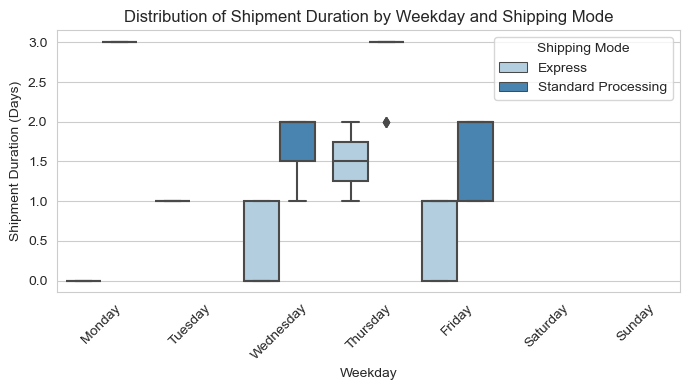

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as grouped boxplots for each weekday and shipping mode with custom order
plt.figure(figsize=(7, 4))
sns.boxplot(x='weekday', y='shipment_duration', hue='ship_mode', data=df_dur_readytoship_truck, palette='Blues', order=custom_order)
plt.title('Distribution of Shipment Duration by Weekday and Shipping Mode')
plt.xlabel('Weekday')
plt.ylabel('Shipment Duration (Days)')
plt.legend(title='Shipping Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#KPI 3

In [49]:
df_order_del_time.head()


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
0,CA-2019-138933,2019-04-29,Express,2019-05-03,4 days
1,CA-2019-109666,2019-04-29,Standard Processing,2019-05-03,4 days
2,CA-2019-113061,2019-04-29,Standard Processing,2019-05-06,7 days
3,CA-2019-168081,2019-05-01,Standard Processing,2019-05-06,5 days
4,US-2019-150147,2019-05-01,Standard Processing,2019-05-07,6 days


In [59]:
import pandas as pd

# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

print(average_delivery_time)


ship_mode
Express                         4 days 11:31:12
Standard Processing   4 days 15:20:55.813953488
Name: delivery_time, dtype: timedelta64[ns]


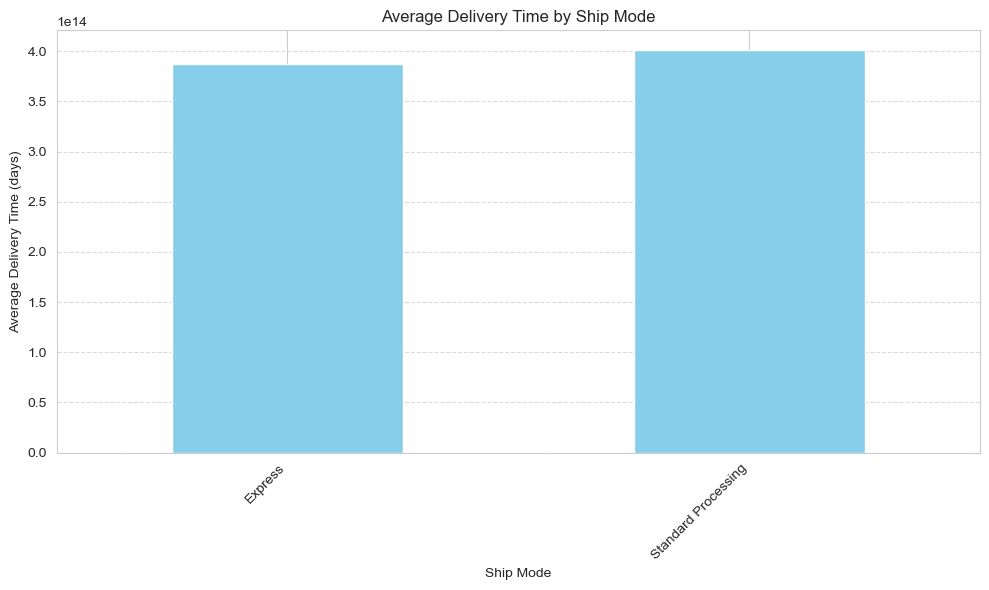

In [60]:
# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_delivery_time.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
df_order_del_time2.head()

,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04,5 days
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04,6 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days
3,CA-2019-158099,2019-09-11,2019-09-05,2019-09-06,5 days
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11,5 days


In [62]:
# Calculate the average delivery time
average_delivery_time2 = df_order_del_time2['delivery_time2'].mean()

print("Average Delivery Time from DataFrame 2:", average_delivery_time2)


Average Delivery Time from DataFrame 2: 4 days 16:21:49.090909090


In [ ]:
#kpi 4

In [63]:
df_order_del_total.head()

,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time
0,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days
1,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days
2,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days
3,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days
4,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days


In [67]:
# Convert 'order_date' to datetime if it's not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])

# Add a new column for weekdays
df_order_del_total['order_weekday'] = df_order_del_total['order_date'].dt.day_name()

df_order_del_total.sample(3)



,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday
81,US-2019-159093,2019-05-21,2019-05-09,RS-19420,Ricardo Sperren,12 days,Thursday
305,CA-2019-134376,2019-10-14,2019-10-02,TT-21265,Tim Taslimi,12 days,Wednesday
257,CA-2019-133935,2019-09-30,2019-09-18,JW-15220,Jane Waco,12 days,Wednesday


In [68]:
# Group by weekday and calculate average delivery time
average_delivery_time_weekday = df_order_del_total.groupby('order_weekday')['total_delivery_time'].mean()

print(average_delivery_time_weekday)


order_weekday
Friday      10 days 14:57:52.941176470
Monday      11 days 17:31:41.123595505
Saturday     7 days 19:38:10.909090909
Sunday      11 days 01:06:27.692307692
Thursday     9 days 21:09:09.152542372
Tuesday     11 days 06:08:22.325581395
Wednesday   11 days 04:18:06.792452830
Name: total_delivery_time, dtype: timedelta64[ns]


In [73]:
import pandas as pd

# Assuming df_order_del_total is your DataFrame

# Convert 'order_date' and 'arrival_scan_date' to datetime if they're not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])
df_order_del_total['arrival_scan_date'] = pd.to_datetime(df_order_del_total['arrival_scan_date'])

# Calculate the order time in hours
df_order_del_total['order_time_hours'] = (df_order_del_total['arrival_scan_date'] - df_order_del_total['order_date']).dt.total_seconds() / 3600

df_order_del_total.head()


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday,order_time_hours
0,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0
1,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0
2,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0
3,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0
4,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


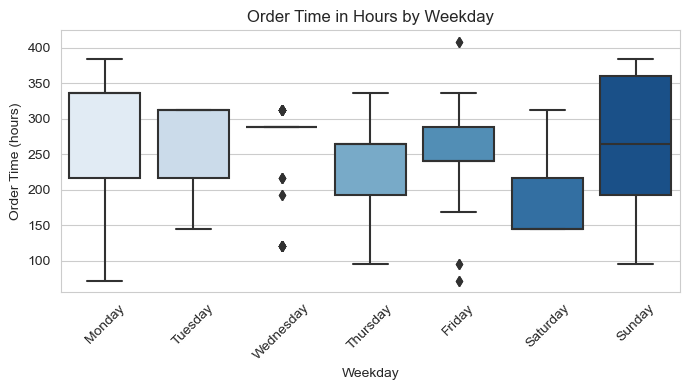

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_order_del_total is your DataFrame

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_hours', data=df_order_del_total, palette='Blues', order=weekday_order)
plt.title('Order Time in Hours by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


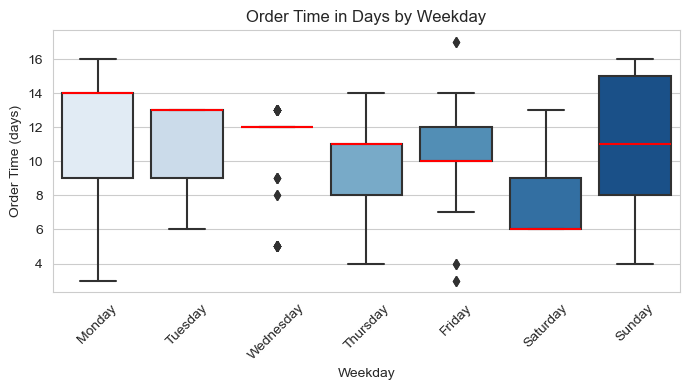

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_days', data=df_order_del_total, palette='Blues', order=weekday_order, medianprops={'color':'red'})
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


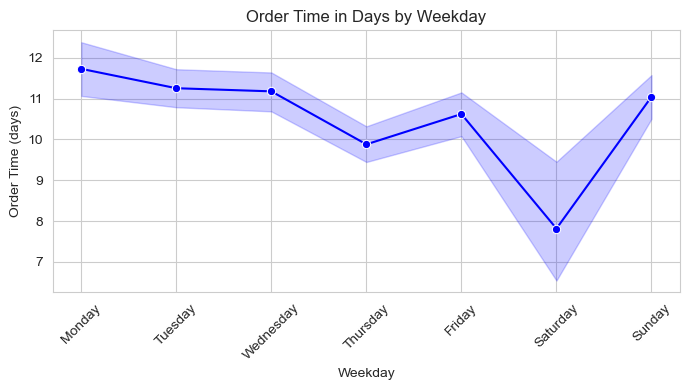

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


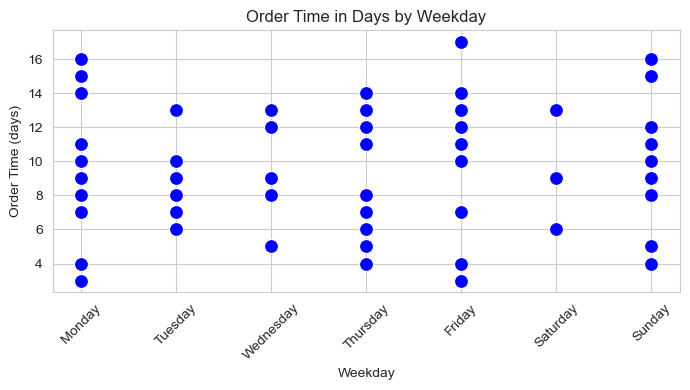

In [90]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting scatter plot
plt.figure(figsize=(7, 4))
sns.scatterplot(x='order_weekday', y='order_time_days', data=df_order_del_total, color='blue', s=100)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


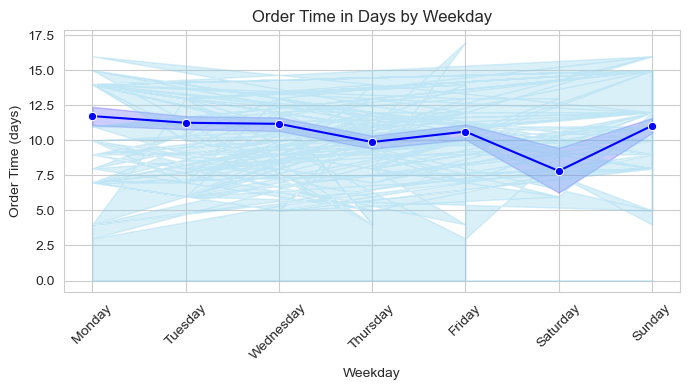

In [92]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting area plot
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.fill_between(df_order_del_total['order_weekday'], df_order_del_total['order_time_days'], color='skyblue', alpha=0.3)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


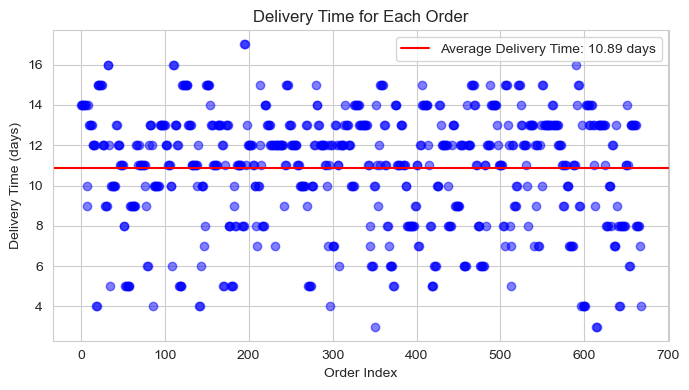

In [97]:
# Calculate average delivery time in days
average_delivery_time_days = df_order_del_total['total_delivery_time_days'].mean()

# Plotting scatter plot with average line
plt.figure(figsize=(7, 4))
plt.scatter(df_order_del_total.index, df_order_del_total['total_delivery_time_days'], color='blue', alpha=0.5)
plt.axhline(y=average_delivery_time_days, color='red', linestyle='-', label=f'Average Delivery Time: {average_delivery_time_days:.2f} days')
plt.title('Delivery Time for Each Order')
plt.xlabel('Order Index')
plt.ylabel('Delivery Time (days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()